<a href="https://colab.research.google.com/github/eunseochu/OB_13th/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_%ED%95%A9%EC%84%B1%EA%B3%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **4. 합성곱 신경망(CNN)**

### **1) 합성곱 신경망** 
합성곱 신경망은 데이터가 가진 특징들의 패턴을 학습하는 알고리즘
- 컴퓨터 비전 분야에서 많이 사용됨
- 대표적으로 이미지 분류, 객체 탐지, 스타일 전이 등
  - 이미지 분류 문제: 고양이 또는 강아지 사진으로 모델을 학습시키면,<br/> 모델은 이미지의 특징을 추출해 고양이 또는 강아지를 분류하여 이미지를 인식할 수 있는 능력을 갖춤
  - 객체 탐지 사례: 이미지에서 특정한 객체를 인식하고 어디에 있는지 위치까지 파악하는 기술로, <br/> 인식한 객체가 어떤 클래스에 속하는지 분류 확률과 예측을 함께 알려줌 <br/> (경계 박스를 찾는 문제는 회귀 분석으로 해결하며, 클래스를 예측하는 문제는 분류 문제로 해결)
  - 스타일 전이: 콘텐츠 이미지와 스타일 참조 이미지를 이용해, <br/> 콘텐츠의 기본 형태를 유지하고 스타일을 입혀서 새로운 이미지를 생성하는 기술


#### **1-1) 이미지 표현**
이미지(또는 영상)를 컴퓨터가 이해할 수 있게 하려면 숫자로 표현해야 함

**흑백 이미지** <br/>
0~255 사이의 숫자로 각 픽셀의 화소 값을 나타내는 방식으로 표현할 수 있음
- 숫자 0은 완전히 검은 색을 나타내고 숫자 255는 흰색을 나타냄
- 그 중간에 있는 숫자들은 회색으로 표현
- 화소를 나타내는 숫자는 이미지의 강도를 나타내고, 숫자가 클수록 더 강한 특성을 나타냄

**컬러 이미지** <br/>
컬러 이미지는 R(빨강), G(초록), B(파랑) 채널로 구성된 3장의 이미지를 겹쳐서 표현
- 각 채널 이미지는 채널이 1개인 흑백 이미지와 마찬가지로 0~255 사이의 숫자로 나타냄
- 숫자가 클수록 해당 색상을 더 강하게 표현함
- 채널은 각각이 하나의 이미지로 구분되며, 컬러 이미지는 3개의 채널 이미지를 하나로 결합하여 표현하는 방식

#### **1-2) 합성곱(Convolution)**
입력 이미지에 대하여 일반적으로 정방형 크기를 가지는 커널을 사용하여 입력 이미지에 대한 특성을 추출하는 방법
- 합성곱 연산을 통해서 추출된 이미지를 특성맵(feature map)이라고 부름
- 추출된 특성맵을 딥러닝 모델 학습에 사용하면 훨씬 더 좋은 성능을 보임

**합성곱 연산** <br/>
입력 이미지의 크기는 (세로, 가로) 순서로 shape이 출력됨
- 즉, 세로 5픽셀, 가로 5픽셀의 크기를 가지는 이미지는 (5,5)의 shape를 가짐
- 이러한 입력 이미지의 좌측 상단부터 커널과 같은 크기를 갖도록 입력 이미지의 일부분에 커널이 겹치도록 투영
- 입력 이미지와 커널이 겹치는 부분에 대하여 합성곱 연산을 수행
  - 3x3 사이즈를 가지는 커널이 첫 좌측 상단의 입력 이미지의 3x3 부분과 매칭하여 합성곱 연산을 수행
  - 합성곱 연산은 element-wise 곱셈 연산을 수행 후 모두 더한 값으로 단일 스칼라 값이 나옴
  - 이렇게 나온 결과는 추출된 이미지의 feature map의 좌측 상단의 첫 번째 값이 됨
- 커널 사이즈가 3x3인 경우 총 9개의 가중치를 가지며 오차 역전파 시 커널의 가중치를 업데이트
  - 합성곱의 신경망이 이미지 특성 추출에 효율적인 이유는 바로 커널의 공유 가중치 때문
  - 오차 역전파 시 커널의 그래디언트를 계산할 때 9개에 대해서만 업데이트하면 되므로, <br/> 완전 연결층을 사용할 때보다 연산량이 훨씬 적다는 장점

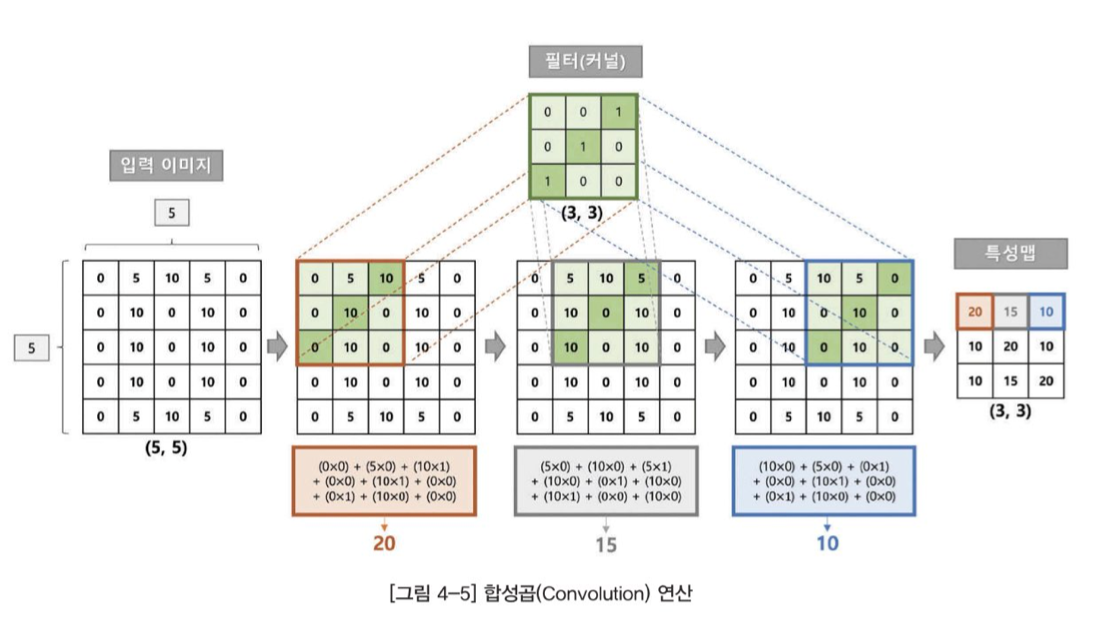

#### **1-3) 채널(channel)**
채널은 입력 이미지를 구성하는 2차원 배열의 개수
- 흑백 이미지는 안일 채널, 즉 채널의 개수가 1개인 이미지
- 컬러 이미지는 R, G, B 3개의 채널을 가지는 이미지이므로 3개의 채널을 가짐

**다중 채널의 합성곱 연산** <br/>
입력 이미지가 여러 개의 채널을 갖는 경우, 합성곱 연산을 수행할 때 특성 맵의 생성 과정을 잘 살펴봐야 함
- 입력 이미지의 채널 개수만큼 커널의 생성되고, 각 채널마다 하나씩 커널을 적용하여 합성곱 연산을 수행
- 입력 이미지의 채널 개수만큼 합성곱 연산된 결과가 생성됨
- element-wise 덧셈 연산으로 모두 더해주면 최종 특성맵 생성

**파라미터 개수 계산** <br/>
합성곱 레이어에 출력 필터의 개수를 20개로 설정했다면,<br/> 입력 이미지의 채널 개수 3개와 출력 필터의 개수 20개가 곱해져서 총 60개의 커널이 생성됨
- 1개의 커널 사이즈가 3x3으로 설정했다면, (3 x 3 x 입력 채널 수 x 출력 필터 수) = 540개가 됨
- 해당 층에서 업데이트 할 가중치의 그래디언트는 540개
- bias가 20개의 출력 필터 개수만큼 추가되므로,  총 560개의 파라미터가 업데이트될 파라미터의 개수

#### **1-4) 스트라이드(stride)**
커널은 좌측 상단으로부터 입력 이미지를 기준으로 우측으로 이동하면서 합성곱 연산을 수행하고 <br/> 특성맵에 결과를 채워나는데, 이때 이동하는 간격을 스트라이드로 정의하며, 주로 1 또는 2로 설정함
- 스트라이드를 1로 설정 시 커널은 우측으로 1픽셀씩 이동하게 되며, <br/> 커널이 입력 이미지의 우측 끝까지 이동했다면 아래 방향으로 1칸 좌측 첫 번째 픽셀로 이동하며 추출함
- 스트라이드를 2로 설정하게 되면 2픽셀씩 건너뛰기 때문에 특성맵의 크기가 1/2로 줄어들게 됨
- 텐서플로 케라스에서 제공하는 Conv2D 레이어의 strides 매개변수에 스트라이드 지정 가능

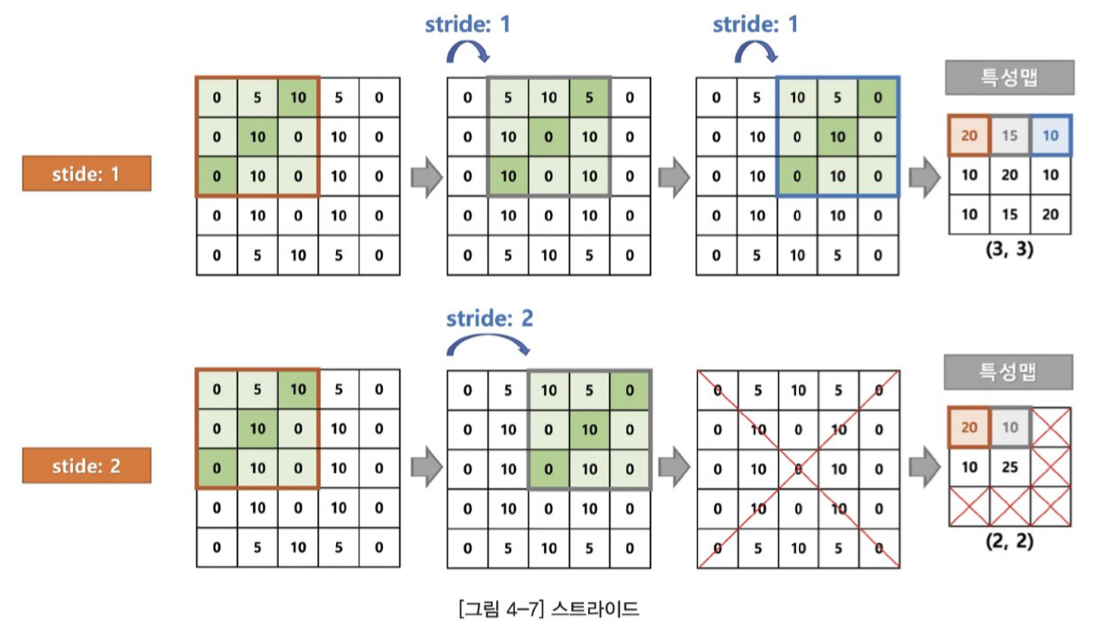

#### **1-5) 패딩(padding)**
추출된 특성맵의 크기가 입력 이미지 대비 줄어들지 않도록 패딩을 설정할 수 있음
- 커널 크기가 3x3이고, 스트라이드에서 1로 설정하게 되는 경우에도 <br/> 추출된 특성맵의 사이즈는 입력 이미지 대비 가로로 2픽셀, 세로로 2픽셀씩 줄어들게 됨
- 일반적으로 zero-padding을 사용하게 되며, 입력 이미지의 가장 자리에 0으로 채워진 패딩 값으로 채운 후 추출
  - 패딩을 적용한 후 합성곱 연산을 수행하게 되면 특성맵의 크기가 줄어들지 않음
  - 텐서플로 케라스의 Conv2D 레이어에서 padding = 'same'으로 설정하면 zero-padding을 적용

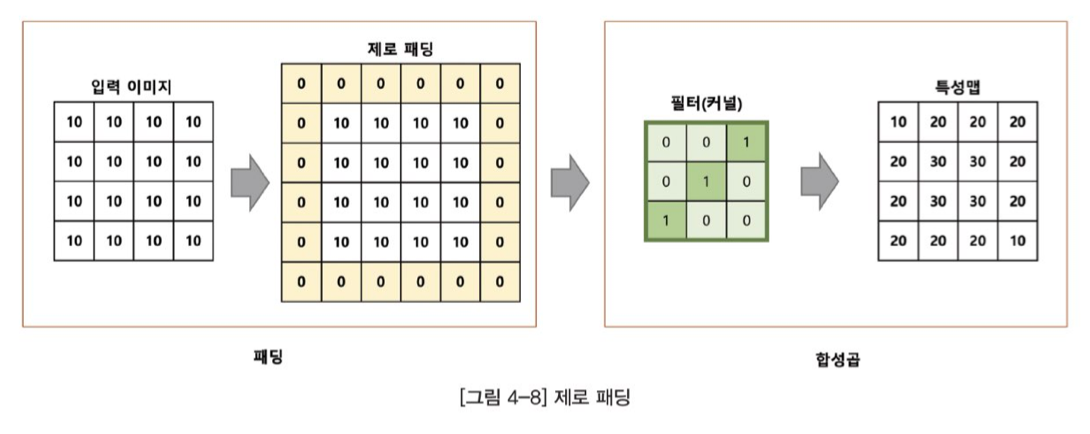

#### **1-6) 특성맵(feature map) 사이즈**
패딩과 스트라이드를 적용하며 입력 데이터와 필터의 크기가 주어졌을 때 출력 데이터의 크기를 구하는 식

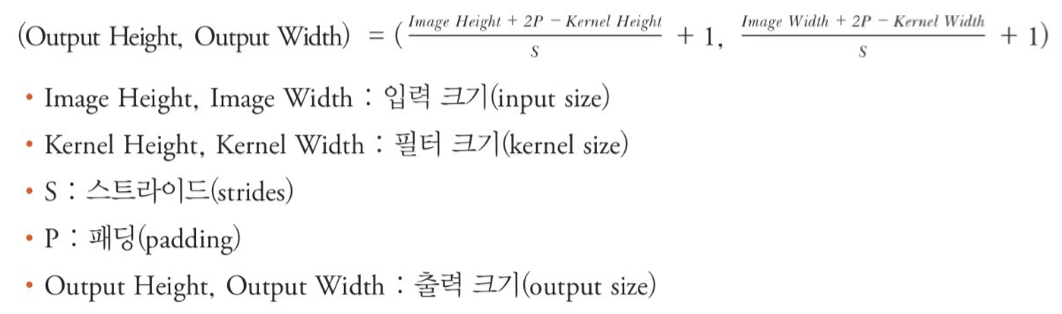

#### **1-7) 풀링(pooling)**
풀링(pooling) 레이어는 추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어
- 풀링 레이어를 사용하면 이미지 축소를 통해 연산량을 감소하고 과대적합을 방지할 수 있음
- 크게 최대 풀링(max pooling)과 평균 풀링(average pooling)으로 나뉨
  - 최대 풀링은 특징의 값이 큰 값이 다른 특징들을 대표한다는 개념으로 도입되었으며, <br/> 커널의 크기가 2 x 2로 주어질 때 입력 이미지의 2 x 2 픽셀 중 최대값이 출력 값으로 선택됨
  - 평균 풀링을 수행하면 2 x 2 픽셀들의 평균 값이 출력 값으로 나옴
- 풀링 레이어 역시 스트라이드 값을 가지며 스트라이드를 2로 설정하면 2칸씩 건너뛰며 풀링을 수행
  - 최대 풀링의 커널 크기를 2x2로 설정하고 스트라이드를 2로 설정 시, <br/> 출력 이미지는 입력 이미지 대비 세로 1/2, 가로 1/2로 줄어들어 입력 이미지 대비 총 1/4 크기로 줄어듬

### **2) 간단한 모델 생성**
mnist 손글씨 데이터셋을 가지고 간단한 구조의 합성곱 신경망 모델을 생성

#### **2-1) 데이터 로드 및 전처리**

In [1]:
# tensorflow 모듈 import 
import tensorflow as tf

In [2]:
# MNIST 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


- 데이터셋을 불러오면 훈련 셋과 검증 셋으로 구분하여 튜플 형태로 정리
- 훈련 셋의 개수는 60,000개, 검증 셋의 개수는 10,000개
- 가로, 세로 각각 28픽셀인 손글씨 이미지와 손글씨가 나타내는 숫자 레이블(정답)이 매칭

**훈련 셋의 첫 번째(인덱스 0) 이미지 출력** <br/>
숫자 5에 대한 손글씨 이미지

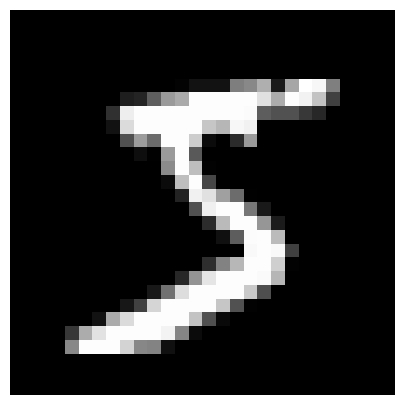

In [3]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx], cmap="gray")
    plt.axis("off")
    plt.show()

plot_image(x_train, 0)

**훈련 셋과 검증 셋의 이미지 픽셀을 나타내는 값의 최소값 최대값 출력** <br/>
이미지 픽셀이 0~255 범위의 숫자로 구성된 것을 파악할 수 있음

In [4]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


**입력 이미지 픽셀 값 정규화 변환** <br/>
이미지 픽셀 값을 최대한 255로 나누어 주면 0~1 범위로 스케일이 정규화

In [5]:
# 정규화(Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


**채널 추가** <br/>
mnist 데이터셋은 색상을 나타내는 채널이 1개인 모노 컬러 이미지로 구성되었으므로,<br/> CNN 모델에 주입하기 위해서 색상을 나타내는 채널을 추가해 주어야 함 

In [7]:
# 채널 추가
print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)    

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


- tf.newaxis 축을 텐서 배열에 직접 추가하는 방식
- (60000, 28, 28) 형태의 텐서가 (60000, 28, 28, 1) 형태로 변환
- [] 안에서 채널을 추가하고자 하는 위치에 tf.newaxis를 작성
  - 가장 마지막 축에 채널을 추가하기 위해 [.... tf.newaxis]로 작성
  - 가장 앞에 차원을 추가 하고 싶다면 [tf.newaxis...]
  - 두 번째 차원을 추가하고 싶다면 [:, tf.newaxis,:,:]로 작성

#### **2-2) Sequential API로 모델 생성 및 학습** 
Sequential API를 사용하여 합성곱 레이어 1개, 풀링 레이어 1개를 적용하는 간단한 모델을 생성

**CNN 모델 구조**

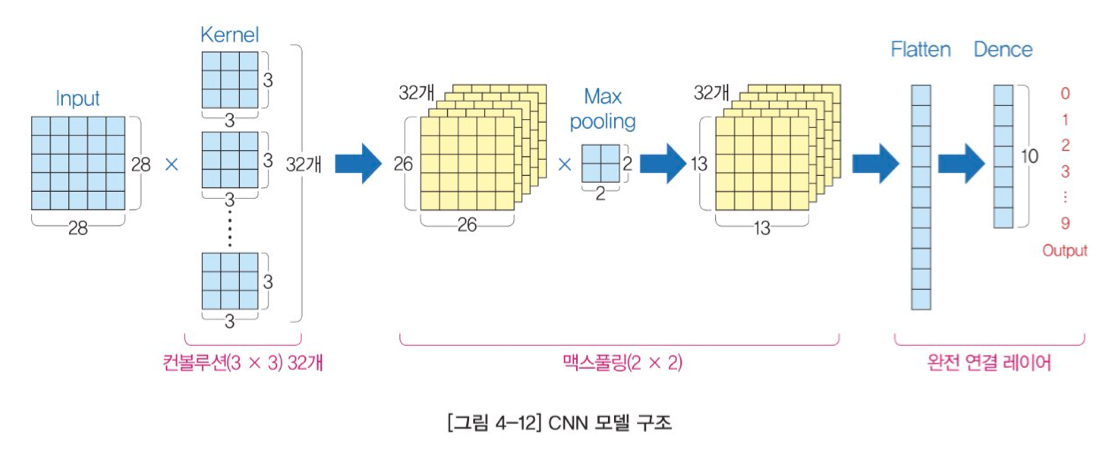

**모델 생성**

In [8]:
# Sequential API를 사용하여 샘플 모델 생성
model = tf.keras.Sequential([
    # Convolution 적용 (32 filters)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', 
                           input_shape=(28, 28, 1), name='conv'),
    # Max Pooling 적용
    tf.keras.layers.MaxPooling2D((2, 2), name='pool'),
    # Classifier 출력층 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax'),
])

- 최종 분류기로 Dense 레이어를 적용하기 위해, Flatten 층을 추가하여 1차원 배열로 펼쳐줌
- 합성곱은 Conv2D 레이어를 사용하고, (3, 3) 크기의 서로 다른 32가지 종류의 커널을 적용
- ReLU 활성화 함수를 적용
- name 속성에 레이어 이름을 'conv'라고 지정
- 풀링 레이어는 (2, 2) 크기로 최대 풀링(max pooling)을 적용하고, 레이어 이름 속성도 추가
- 최종 분류기는 정답 레이블이 0~9까지의 10개 값을 가지므로 노드 개수는 10
- 분류 클래스가 10개인 다중 분류 문제이므로 활성화 함수로 softmax 적용

**모델 컴파일** <br/>
앞서 정의한 모델 구조에 옵티마이저, 손실함수, 평가지표를 설정해 주고 컴파일하면 모델 인스턴스 생성
- fit() 메소드에 훈련 셋과 검증 셋을 주입하고, epoch를 10으로 지정
- 코드 셀을 실행하면 모델이 학습하면서 epoch 당 손실과 평가 결과를 출력
- 두 번째 epoch를 마친 상태에서도 훈련 셋과 검증 셋 모두 97%에 가까운 정확도를 보임

In [11]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0177 - accuracy: 0.9949 - val_loss: 0.0609 - val_accuracy: 0.9824
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0137 - accuracy: 0.9961 - val_loss: 0.0560 - val_accuracy: 0.9835
Epoch 3/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0117 - accuracy: 0.9969 - val_loss: 0.0614 - val_accuracy: 0.9822
Epoch 4/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0104 - accuracy: 0.9968 - val_loss: 0.0613 - val_accuracy: 0.9844
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0088 - accuracy: 0.9976 - val_loss: 0.0677 - val_accuracy: 0.9829
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0075 - accuracy: 0.9980 - val_loss: 0.0692 - val_accuracy: 0.9817
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0064 - accuracy: 0.9984 - val_loss: 0.0745 -

**손실과 평가지표 계산** <br/>
evaluate() 메소드를 모델 인스턴스에 적용하면 모델의 학습된 가중치를 사용하여 손실과 평가지표 계산
- 검증 셋에 대하여 약 98%의 정확도를 나타냄

In [12]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 3s 9ms/step - loss: 0.0773 - accuracy: 0.9832


[0.07733545452356339, 0.9832000136375427]

**10 epoch 동안 모델의 예측 오차와 정확도에 대한 그래프** <Br/>
훈련 셋에 대한 손실은 계속 줄어드는데 검증 셋의 손실은 어느 수준에서 더 이상 낮아지지 않음
- 4 epoch 이후부터는 모델이 과대적합으로 진행되었다는 것을 파악할 수 있음

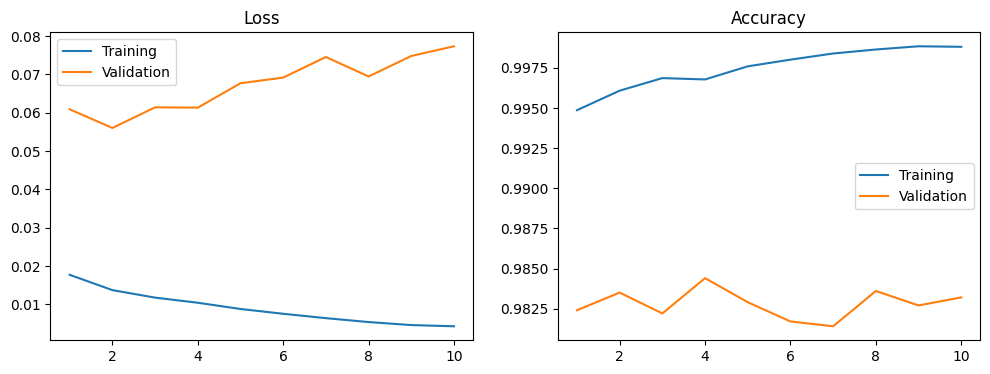

In [13]:
def plot_loss_acc(history, epoch):

    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].plot(range(1, epoch + 1), loss, label='Training')
    axes[0].plot(range(1, epoch + 1), val_loss, label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch + 1), acc, label='Training')
    axes[1].plot(range(1, epoch + 1), val_acc, label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

    plt.show()

plot_loss_acc(history, 10)

#### **2-3) 모델 구조 파악**
모델 인스턴스에 summary() 메소드를 적용해 주면, 모델의 구조를 요약해서 보여줌
- 각 레이어의 이름과 출력 텐서의 형태, 그리고 각 레이어를 구성하는 파라미터(가중치)의 개수를 알 수 있음

**합성곱 신경망 구조** <Br/>
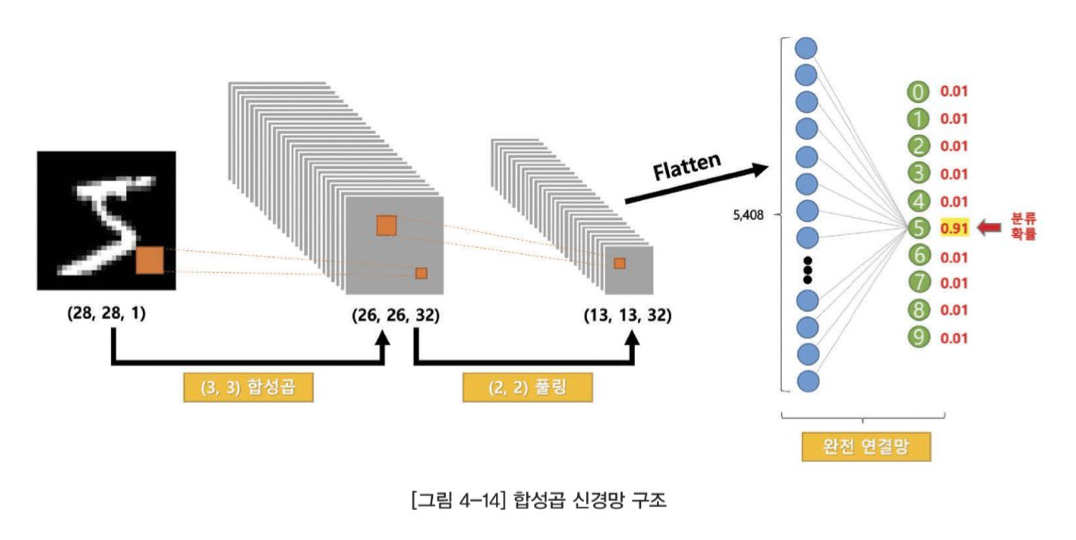

In [14]:
# 모델 구조 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


- (28, 28, 1) 형태의 입력 텐서가 Conv2D를 거치면서 (26, 26, 32) 형태로 변환
  - (3, 3) 크기의 합성곱 필터를 사용하기 때문에 이미지 가로, 세로 크기가 2씩 줄어듦
  - 서로 다른 32개의 필터를 적용했기 때문에 (26, 26)크기의 특성맵이 32개 생성
  - (28, 28, 1) 이미지에 서로 다른 32개 커널을 적용해서 32가지 종류의 피처(특징)을 추출
- (2, 2)크기의 풀링 레이어를 적용했기 때문에 이미지 크기가 1/2로 줄어듦
  - 풀링 레이어를 거치면 (13, 13, 32) 텐서로 변환 
  - Flatten 층에서 3차원 텐서를 1차원 텐서로 펼치면 5,408개(13 x 13 x 32)의 원소를 갖는 1차원 벡터
- 이 벡터를 출력 노드 10개인 레이어로 보내면 최종 분류 값을 예측해 출력
  - 이미지를 입력받아 특징을 추출하고 이미지가 나타내는 숫자를 예측

**입력 텐서 형태** <br/>
생성된 모델 인스턴스의 input 속성으로부터 입력 레이어의 텐서를 추출할 수 있음

In [15]:
# 입력 텐서 형태 
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

- 입력 텐서는 (None, 28, 28, 1) 형태
- 가장 앞에 있는 축의 None 값은 배치 크기가 들어오는 위치로서, 배치 크기로 어떤 값이든 가능하다는 의미

**출력 텐서 형태** <br/>
모델의 출력 텐서는 output 속성으로 선택할 수 있음

In [16]:
# 출력 텐서 형태 
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

- 10개의 노드를 갖는 1차원 벡터 형태

**레이어 추출** <Br/>
모델을 구성하는 레이어들을 추출하려면 layers 속성을 확인
- 파이썬 리스트 형태로 레이어 객체를 담아서 보여줌

In [17]:
# 레이어 
model.layers

**레이어 선택** <br/>
우리가 작성한 모델은 4개의 레이어로 구성
- 파이썬 리스트 인덱싱을 적용하여 첫 번째 레이어를 선택
- 첫 번째 인덱스는 0이고, 가장 앞에 있는 Conv2D 레이어를 추출

In [18]:
# 첫번째 레이어 선택
model.layers[0]

**첫 번째 레이어 입력**

In [20]:
# 첫번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

- Conv2D 레이어에는 입력 데이터가 그대로 들어가기 때문에 (None, 28, 28, 1) 형태를 가짐

**첫 번째 레이어 출력**

In [21]:
# 첫번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

- Conv2D 레이어를 거치면 픽셀 사이즈가 2씩 줄어들고 채널 개수가 32개로 늘어남
- (None, 26, 26, 32) 형태를 가짐

**레이어의 가중치 행렬 추출** <br/>
weights 속성을 각 레이어 인스턴스에 적용하면 됨
- 텐서플로 변수는 가중치와 같이 모델 학습 과정에 값이 업데이트되는 경우 사용
- 2개의 텐서플로 변수 행렬이 확인
  - 첫 번째 변수는 'conv/kernel:0'이라는 이름과 같이 커널 행렬의 가중치를 나타냄
  - 두 번째 변수는 'conv/bias:0'이라는 이름에서 알 수 있듯이, 각 커널의 상수항을 나타냄

In [22]:
# 첫번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 5.03587484e-01, -1.07667863e+00,  3.13262075e-01,
            1.38049722e-01,  5.01687050e-01, -8.67024660e-01,
            2.41158307e-01,  9.38269719e-02, -1.14147282e+00,
            4.11948919e-01,  2.24155009e-01, -4.36101794e-01,
           -2.00304404e-01,  1.48291722e-01,  4.42348003e-01,
            3.90194833e-01,  4.28757608e-01, -4.37867552e-01,
           -1.46952820e+00, -8.80905509e-01, -9.89753231e-02,
            9.18659493e-02,  2.54658639e-01,  3.27077210e-01,
            2.11151466e-01, -2.53411025e-01, -5.04529119e-01,
            3.50518316e-01,  3.64978984e-02, -2.51830280e-01,
            4.18155998e-01, -1.39039075e+00]],
 
         [[ 6.26940489e-01, -8.47884864e-02,  3.82395089e-01,
           -7.41635561e-01,  1.25418365e-01, -7.43801355e-01,
            7.63379335e-01, -1.07927650e-01, -9.23994005e-01,
           -2.60104179e-01,  3.46967399e-01, -8.16801965e-01,
           

**총 학습 가능한 파라미터 수** <br/>
- 커널 가중치의 shape이 (3, 3, 1, 32)
  - (3, 3)은 필터의 크기, (1)은 입력층의 채널 개수, (32)는 출력층의 채널 개수
  - layer[0]의 커널의 학습 가능한 파라미터 수는 3 x 3 x 1 x 32 = 288개
- 상수항의 가중치 shape는 (32,)이고 이는 출력층의 채널 수
- layer[0]의 총 학습 가능한 파라미터 수는 커널과 상수항을 더해서 288 + 32 = 320개가 됨

In [23]:
# 첫번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 5.03587484e-01, -1.07667863e+00,  3.13262075e-01,
           1.38049722e-01,  5.01687050e-01, -8.67024660e-01,
           2.41158307e-01,  9.38269719e-02, -1.14147282e+00,
           4.11948919e-01,  2.24155009e-01, -4.36101794e-01,
          -2.00304404e-01,  1.48291722e-01,  4.42348003e-01,
           3.90194833e-01,  4.28757608e-01, -4.37867552e-01,
          -1.46952820e+00, -8.80905509e-01, -9.89753231e-02,
           9.18659493e-02,  2.54658639e-01,  3.27077210e-01,
           2.11151466e-01, -2.53411025e-01, -5.04529119e-01,
           3.50518316e-01,  3.64978984e-02, -2.51830280e-01,
           4.18155998e-01, -1.39039075e+00]],

        [[ 6.26940489e-01, -8.47884864e-02,  3.82395089e-01,
          -7.41635561e-01,  1.25418365e-01, -7.43801355e-01,
           7.63379335e-01, -1.07927650e-01, -9.23994005e-01,
          -2.60104179e-01,  3.46967399e-01, -8.16801965e-01,
           4.95794505e-01,  

In [24]:
# 첫번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.02938902, -0.19736885, -0.37306058, -0.42659295, -0.53467387,
       -0.02435925, -0.01785566, -0.08962563, -0.02450221, -0.42658105,
       -0.2541654 , -0.02488492, -0.35869497, -0.18044141, -0.26101288,
       -0.5139159 ,  0.02816757, -0.48369667,  0.07617947, -0.45752606,
        0.01366414, -0.318379  , -0.6378602 , -0.5285659 , -0.19849186,
       -0.14261386, -0.01025224, -0.3422794 , -0.43468374,  0.11940445,
       -0.30397847, -0.08786243], dtype=float32)>

**레이어의 이름으로 선택** <br/>
레이어의 이름(name 속성)을 사용하여 해당 레이어를 선택할 수 있음
- 모델을 정의할 때 Conv2D 합성곱 레이어의 이름을 'conv'라고 지정해 두었기 때문

In [25]:
# 레이어 이름 사용하여 레이어 선택
model.get_layer('conv')

**activator 모델 정의** <br/>
모델에 입력 데이터를 넣어주고, 모델의 첫 번째와 두 번째 레이어를 최종 출력으로 갖는 activator 모델 정의
- 첫 번째 샘플에 대하여 각 레이어의 출력을 예측

In [26]:
# 샘플 이미지의 레이어별 출력을 리스트에 추가 (첫번째, 두번째 레이어)
activator = tf.keras.Model(inputs=model.input, 
                           outputs=[layer.output for layer in model.layers[:2]] ) 
activations = activator.predict(x_train_in[0][tf.newaxis, ...]) 

len(activations)

1/1 [==============================] - 0s 462ms/step


2

**첫 번째 레이어 출력층** <br/>
2개의 출력 텐서 중 첫 번째 텐서는 Conv2D 레이어의 출력
- 텐서의 형태는 (1, 26, 26, 32)인데, 여기서 1은 입력 이미지의 개수
- 샘플이 1개라는 뜻

In [27]:
# 첫 번째 레이어(conv) 출력층 
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

**첫 번째 레이어에서 출력되는 특성맵 이미지 시각화** <br/>
32개 커널별로 구분하여 시각화하면 출력 이미지의 특징이 조금씩 차이가 있는 것을 볼 수 있음
- 각 커널은 입력 이미지로부터 서로 다른 피처를 추출하는 역할

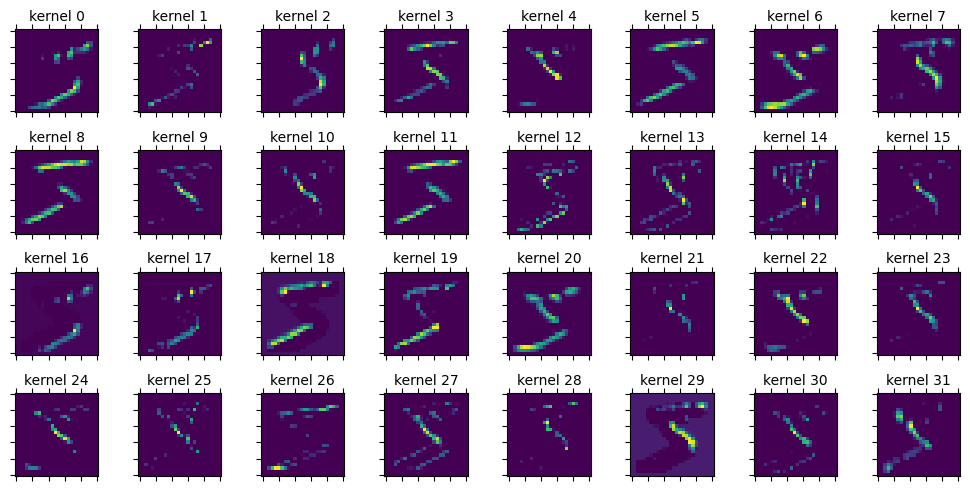

In [28]:
# Convolution 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

**두 번째 레이어 출력층** <br/>
두 번쩨 레이어는 최대 풀링 레이어
- 출력하는 텐서는 (1, 13, 13, 32) 형태를 가짐

In [29]:
# 두 번째 레이어(pool) 출력층 
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


**커널 별로 출력되는 특성맵 이미지 시각화** <br/>
앞선 Conv2D 출력 이미지에 비하여 화서 크기가 굵어짐
- 최대 풀링은 인근 픽셀들을 모아서 최대값으로 고정하기 때문에 픽셀 수는 줄이면서 특징을 더욱 강하게 드러냄

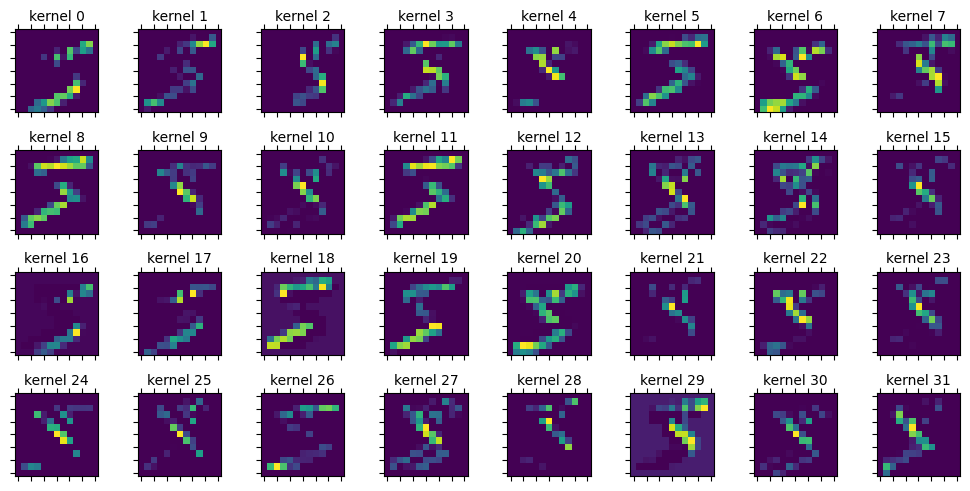

In [30]:
# 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

### **3) 복잡한 모델 생성**
텐서플로 케라스의 Functional API를 사용하면, Sequential API로 구현할 수 없는 복잡한 구조의 모델 정의 가능
- 각 레이어를 기준으로 입력이 2개 이상이거나 출력이 2개 이상인 모델 생성 가능
- 중간에 있는 레이어들을 건너뛰고 뒤쪽에 있는 레이어로 출력 텐서를 전달하는 방식으로 직접 연결 가능

#### **3-1) 데이터셋 준비**

In [31]:
import tensorflow as tf
import numpy as np

In [32]:
# MNIST 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


- 0~9까지 숫자를 손글씨로 쓴 이미지(x)와 정답(y) 숫자로 구성

**새로운 출력값 배열 생성** <br/>
0~9까지 숫자를 맞추는 정답 외에 홀수인지 짝수인지를 판단하는 정답(y_odd)를 새로 만들어 추가
- y_train 값이 홀수면 1, 짝수면 0으로 하는 Y_train_odd 배열을 새로 만듦

In [33]:
# 새로운 출력값 배열을 생성 (홀수: 1, 짝수: 0)
y_train_odd = []
for y in y_train:
    if y % 2==0:
        y_train_odd.append(0)
    else:
        y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

**원본 y_train 배열과 홀짝으로 분류한 y_train_odd 배열 비교** <Br/>

In [34]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


- 홀수 짝수 여부가 잘 정리된 것을 확인 가능

**검증 데이터셋에도 y_vaild_odd 추가**

In [35]:
# Validation 데이터셋 처리
y_valid_odd = []
for y in y_valid:
    if y % 2==0:
        y_valid_odd.append(0)
    else:
        y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

**입력 이미지 데이터 정규화** <br/>
색상이 하나인 모노 컬러 이미지이므로, 새로운 축을 추가하고 채널 개수를 1로 지정

In [36]:
# 정규화(Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

# 채널 추가
x_train_in = tf.expand_dims(x_train, -1)
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


- exapand_dims() 함수에 원본 배열을 입력하고, 새롭게 추가하려는 축의 인덱스를 지정하면 새로운 축 추가
- 축의 인덱스를 -1로 지정했기 때문에 새로운 축은 끝에 추가
- (60000, 28, 28) 배열이 (60000, 28, 28, 1) 배열이 됨

#### **3-2) Functional API로 다중 입력, 다중 출력 레이어 생성**
Functional API를 사용하면 사용자가 원하는 복잡한 구조의 모델을 만들 수 있음
- 다중 입력, 다중 출력과 같은 구조를 만들 수 있음
- 다음 코드의 입력 레이어의 inputs의 경우 Conv2D 레이어와 Flatten 입력으로 사용됨
  - 입력 레이어는 2개의 출력을 갖게 됨
  - 서로 다른 2개의 출력은 각각 다른 레이어의 입력으로 사용됨
  - 최종적으로 Concatenate 레이어에서 합쳐진 다음에 Dense 레이러를 통과
- 함수의 입력과 출력으로 표현할 수 있어서 자유롭게 모델 구조를 정의할 수 있는 장점

In [38]:
# Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28, 28, 1))

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation='softmax')(concat)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_1 (Conv2D)              (None, 26, 26, 32)   320         ['input_2[0][0]']                
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 13, 13, 32)  0           ['conv2d_1[0][0]']               
                                                                                                  
 flatten_3 (Flatten)            (None, 5408)         0           ['max_pooling2d_1[0][0]']        
                                                                                            

**모델 구조 그래프로 출력** <br/>
케라스의 utils 모듈의 plot_model 함수를 사용하고, 모델을 입력하면 모델 구조를 그려줌
- 입력 레이어가 2개의 출력으로 나누어짐
- 마지막 Dense 레이어를 통과하기 전에 Concatenate 레이어에서 하나로 합쳐지는 구조

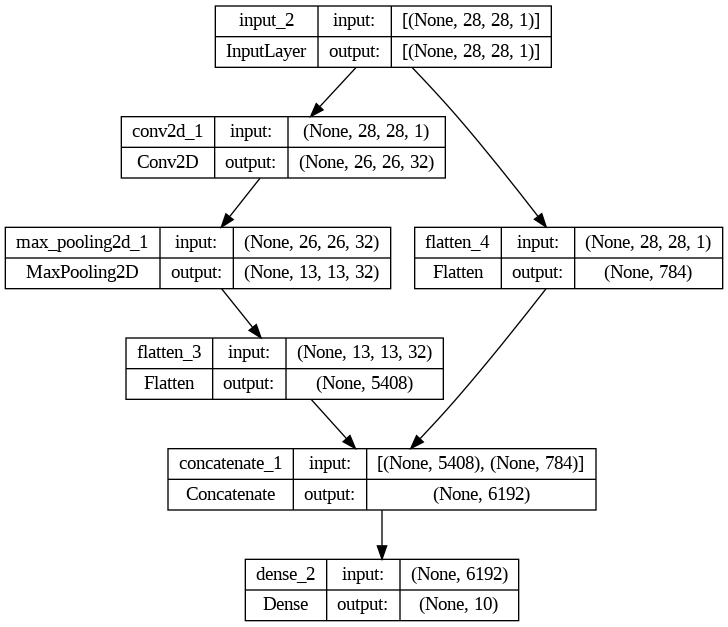

In [41]:
# 모델 구조 출력 및 이미지 파일로 저장
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

**모델 컴파일 및 훈련, 성능 확인** <br/>
다중 분류 모델에 맞게 손실함수와 평가지표를 지정하고, 옵티마이저로는 adam을 사용
- 10 epoch에 대한 모델 훈련을 마치고 검증 데이터에 대한 모델의 예측 성능을 평가
- 10개의 숫자 레이블을 맞추는 모델의 정확도는 약 98%로 앞에서 학습한 Sequential 모델과 큰 차이는 없음

In [42]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

# 모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.2148 - accuracy: 0.9383 - val_loss: 0.0901 - val_accuracy: 0.9748
Epoch 2/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0790 - accuracy: 0.9771 - val_loss: 0.0605 - val_accuracy: 0.9807
Epoch 3/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0600 - accuracy: 0.9819 - val_loss: 0.0615 - val_accuracy: 0.9801
Epoch 4/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0492 - accuracy: 0.9846 - val_loss: 0.0570 - val_accuracy: 0.9812
Epoch 5/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0408 - accuracy: 0.9873 - val_loss: 0.0531 - val_accuracy: 0.9833
Epoch 6/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0338 - accuracy: 0.9894 - val_loss: 0.0537 - val_accuracy: 0.9828
Epoch 7/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0284 - accuracy: 0.9912 - val_loss: 0.0516 -

#### **3-3) 다중 출력 분류 모델**
두 가지 서로 다른 분류 문제를 예측하는 다중 출력 모델을 생성
- 0~9까지 숫자를 맞추는 분류 문제와 홀수, 짝수를 맞추는 분류 문제를 동시에 풀어내는 모델을 정의하는 코드
- 각기 다른 문제에 맞도록 최종 분류기의 출력 레이어를 2개 만드는 것이 핵심

In [43]:
# Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28, 28, 1), name='inputs')

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2), name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_layer (Conv2D)          (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 maxpool_layer (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d_layer[0][0]']           
                                                                                                  
 flatten_layer (Flatten)        (None, 5408)         0           ['maxpool_layer[0][0]']          
                                                                                            

**입력 텐서와 출력 텐서** <br/>
입력은 하나이고, 출력은 10개인 텐서와 1개인 텐서로 두 개가 확인

In [45]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


**모델 구조**

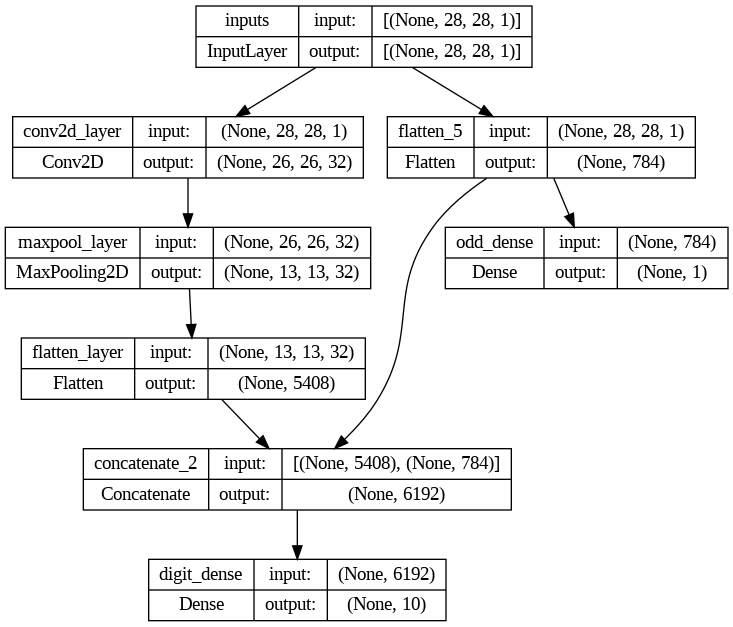

In [44]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

**모델 컴파일 및 훈련** <br/>
- 모델을 컴파일할 때는 출력 Dense 레이어에 name 속성으로 지정한 이름을 key로 하고, <br/> key에 해당하는 레이어에 적용할 손실함수와 가중치를 딕셔너리 형태로 지정
- 모델을 훈련시키기 위해 fit() 메소드를 적용할 때도 출력 값을 2개 지정하고,<br/> 레이어 이름 속성을 key로 하는 딕셔너리 형태로 각각의 출력에 맞는 정답 배열을 입력
- 검증 데이터셋에 대해서도 마찬가지로 구분해 지정

In [46]:
# 모델 컴파일
model.compile(optimizer='adam', 
              loss={'digit_dense': 'sparse_categorical_crossentropy', 'odd_dense': 'binary_crossentropy'}, 
              loss_weights={'digit_dense': 1, 'odd_dense': 0.5}, # loss = 1.0 *sparse_categorical_crossentropy + 0.5*binary_crossentropy
              metrics=['accuracy'])

# 모델 훈련
history = model.fit({'inputs': x_train_in}, {'digit_dense': y_train, 'odd_dense': y_train_odd}, 
                    validation_data=({'inputs': x_valid_in},  {'digit_dense': y_valid, 'odd_dense': y_valid_odd}), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.3752 - digit_dense_loss: 0.2121 - odd_dense_loss: 0.3261 - digit_dense_accuracy: 0.9395 - odd_dense_accuracy: 0.8627 - val_loss: 0.2354 - val_digit_dense_loss: 0.0980 - val_odd_dense_loss: 0.2748 - val_digit_dense_accuracy: 0.9709 - val_odd_dense_accuracy: 0.8894
Epoch 2/10
1875/1875 [==============================] - 70s 38ms/step - loss: 0.2179 - digit_dense_loss: 0.0822 - odd_dense_loss: 0.2715 - digit_dense_accuracy: 0.9761 - odd_dense_accuracy: 0.8922 - val_loss: 0.1977 - val_digit_dense_loss: 0.0664 - val_odd_dense_loss: 0.2627 - val_digit_dense_accuracy: 0.9786 - val_odd_dense_accuracy: 0.8983
Epoch 3/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1922 - digit_dense_loss: 0.0608 - odd_dense_loss: 0.2628 - digit_dense_accuracy: 0.9825 - odd_dense_accuracy: 0.8960 - val_loss: 0.1898 - val_digit_dense_loss: 0.0599 - val_odd_dense_loss: 0.2597 - val_digit_dense_accuracy: 0.9810 -

**모델 성능 평가** <br/>
숫자를 맞추는 문제는 98%의 정확도를 보인 반면, 홀수 여부를 판단하는 문제는 약 90%의 정확도를 보임

In [48]:
# 모델 성능
model.evaluate({'inputs': x_valid_in}, {'digit_dense': y_valid, 'odd_dense': y_valid_odd})

313/313 [==============================] - 4s 13ms/step - loss: 0.1877 - digit_dense_loss: 0.0583 - odd_dense_loss: 0.2588 - digit_dense_accuracy: 0.9833 - odd_dense_accuracy: 0.9022


[0.187731072306633,
 0.05834474414587021,
 0.25877249240875244,
 0.983299970626831,
 0.9021999835968018]

**샘플 이미지 출력** <br/>
검증 데이터셋의 인덱스 0에 해당하는 이미지를 출력하면 숫자 7에 대한 손글씨 이미지

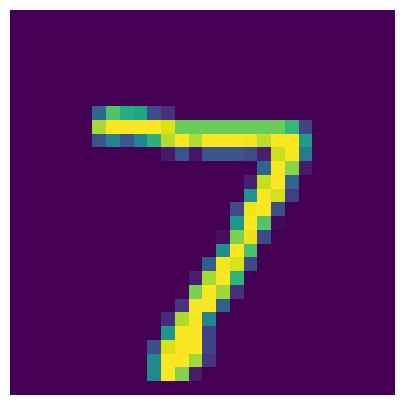

In [49]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx])
    plt.axis("off")
    plt.show()

plot_image(x_valid, 0)

**2개의 분류 문제에 대한 예측 확률** <br/>
검증 데이터셋의 모든 이미지 데이터를 입력해서 2개의 분류 문제에 대한 예측 확률을 구함
- 첫 번째 예측값은 10개 분류 레이블에 대한 확률을 담음
- 두 번째 예측값은 홀수일 확률을 담음

In [50]:
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

313/313 [==============================] - 2s 7ms/step
[1.1776860e-14 2.4314209e-10 5.5934812e-10 2.7834315e-07 1.1814203e-11
 3.4257227e-13 2.9851666e-20 9.9999970e-01 3.9708228e-10 1.6406200e-09]
[0.99951744]


**실제 정답 레이블로 변환** <br/>
넘파이 argmax 함수를 이용하여 예측 확률을 실제 정답 레이블로 변환
- 검증 데이터셋의 첫 10개 이미지에 대한 예측 레이블은 다음과 같으며 첫 번째 이미지를 7로 예측

In [51]:
digit_labels = np.argmax(digit_preds, axis=-1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

**홀수, 짝수 여부에 대한 예측 레이블** <br/>
임계값으로 0.5를 지정하여, 홀수일 확률이 0.5보다 큰 경우 홀수로 분류
- 첫 번째 이미지 7에 대하여 홀수(1)로 잘 분류
- 두 번째 이미지에 대해서는 숫자 2에 해당하는 짝수(0)로 정확하게 분류

In [52]:
odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1, -1)[0]
odd_labels[0:10]

<ipython-input-52-cb61980817f6>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1, -1)[0]


array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

#### **3-4) 전이 학습(Transfer Learning)**
기존에 학습된 모델을 활용해 새로운 모델을 만들어 내는 개념
- 훈련한 모델의 일부를 가져와 그대로 사용하고, 최종 출력층만 새롭게 추가하여 모델을 재구성

**base_model 객체** <br/>
앞에서 학습한 모델에서 입력 레이어부터 Flatten층까지 해당하는 부분 따로 추출하여 base_model 객체 생성
- Flatten층은 'flatten_layer'라는 name 속성을 가짐
- 모델 개요를 출력해서 확인해보면, (28, 28, 1) 이미지를 받아서 5,408개의 피처로 특징을 추출해 출력하는 모델

In [53]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


**모델 구조 시각화**

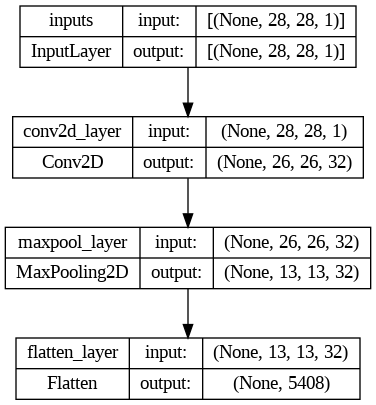

In [54]:
plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

**Sequential API 적용** <br/>
Sequential API를 사용하여 앞에서 정의한 base_model을 레이어로 추가하고, <br/> 최종 분류기 역할을 하는 Dense 레이어를 새롭게 이어서 추가
- 총 파라미터 개수는 54,410개고 모두 훈련이 가능하다고 표시
- 훈련이 가능하다는 뜻은 모델 훈련 시 파라미터 값이 업데이트 됨

In [55]:
# Sequential API 적용
digit_model = tf.keras.Sequential([
                                   base_model,
                                   tf.keras.layers.Dense(10, activation='softmax'),
                                   ])
digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


**모델 구조 출력** <br/>
최종적으로 노드 10개를 가진 분류기 역할을 하는 Dense 레이어가 추가

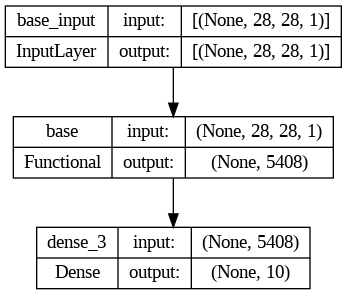

In [56]:
plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')

**모델 컴파일 및 훈련** <br/>
약 98.3% 정도의 정확도

In [57]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1297 - accuracy: 0.9638 - val_loss: 0.0649 - val_accuracy: 0.9796
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0585 - accuracy: 0.9824 - val_loss: 0.0512 - val_accuracy: 0.9839
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0446 - accuracy: 0.9861 - val_loss: 0.0543 - val_accuracy: 0.9830
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0359 - accuracy: 0.9887 - val_loss: 0.0529 - val_accuracy: 0.9834
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0284 - accuracy: 0.9914 - val_loss: 0.0529 - val_accuracy: 0.9849
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0241 - accuracy: 0.9923 - val_loss: 0.0562 - val_accuracy: 0.9826
Epoch 7/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0198 - accuracy: 0.9936 - val_loss: 0.0561 -

**Freeze Model**<br/>
모델 인스턴스의 trainable 속성을 False로 지정하면 모델의 파라미터 값이 고정되어 훈련을 통해 업데이트되지 않음
- 이런 방식으로 Freeze Model인 base_model_frozen을 구성할 수 있음
- 훈련 가능한 파라미터 개수가 0으로 확인됨

In [58]:
# 베이스 모델의 가중치를 고정 (Freeze Model)

base_model_frozen = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable = False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


**Functional API 적용** <br/>
파라미터를 고정한 base_model_input 모델과 새로운 분류기 역할을 하는 Dense 레이어를 Functional API로 구성
- 총 파라미터 개수는 54,410개고 앞서 고정한 320개의 파라미터는 훈련이 불가능
- 훈련 가능한 파라미터는 Flatten 레이어의 출력 5,408개와 Dense 레이어의 10개 노드 사이의 가중치만 해당
- Flatten 레이어 이전에 존재하는 Conv2D 레이어의 파라미터 320개는 포함되지 않게 됨

In [59]:
# Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs=base_model_frozen.input, outputs=dense_output)
digit_model_frozen.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

**모델 컴파일 및 훈련**

In [60]:
# 모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1157 - accuracy: 0.9690 - val_loss: 0.0540 - val_accuracy: 0.9833
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0491 - accuracy: 0.9857 - val_loss: 0.0508 - val_accuracy: 0.9833
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0364 - accuracy: 0.9889 - val_loss: 0.0556 - val_accuracy: 0.9818
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0282 - accuracy: 0.9912 - val_loss: 0.0531 - val_accuracy: 0.9834
Epoch 5/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0224 - accuracy: 0.9933 - val_loss: 0.0517 - val_accuracy: 0.9845
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0186 - accuracy: 0.9941 - val_loss: 0.0519 - val_accuracy: 0.9844
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0153 - accuracy: 0.9956 - val_loss: 0.0560 -

**Freeze Layer** <br/>
모델 전체가 아니라 특정 레이어를 지정하여 파라미터가 업데이트되지 않도록 고정하는 방법도 가능
- Conv2D 레이어를 취소하고 trainable 속성을 False로 지정하는 예제

In [61]:
# 베이스 모델의 Conv2D 레이어의 가중치만 고정 (Freeze Layer)
base_model_frozen2 = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable = False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


**Functional API 적용** <br/>
앞서 고정한 모델에 새로운 분류기 역할을 하는 Dense 레이어를 연결하여 모델을 구성

In [62]:
# Functional API 적용
dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs=base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_5 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

**모델 컴파일 및 훈련**

In [63]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.1154 - accuracy: 0.9680 - val_loss: 0.0553 - val_accuracy: 0.9822
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0495 - accuracy: 0.9855 - val_loss: 0.0503 - val_accuracy: 0.9832
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0360 - accuracy: 0.9892 - val_loss: 0.0483 - val_accuracy: 0.9841
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0281 - accuracy: 0.9910 - val_loss: 0.0561 - val_accuracy: 0.9831
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0224 - accuracy: 0.9930 - val_loss: 0.0501 - val_accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0183 - accuracy: 0.9945 - val_loss: 0.0535 - val_accuracy: 0.9836
Epoch 7/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0151 - accuracy: 0.9952 - val_loss: 0.0531 - 